# Test unitaire - Activité 4





---
Nom : de castro

Prénom : kier

Groupe de TP : tp1a

---

> ☝ **Objectif :** Produire des représentations graphiques des résultats issus du traitement. Intégration de ces représentations dans la page Web.


Dans cette activité, nous allons mettre en valeur les données en utilisant d'une part `matplotlib` une bibliothèque complète permettant de créer des représentations graphiques en Python, et d'autre part `GeoPandas` une bibliothèque dérivée de `Pandas` pour l'analyse de données spatialisées en vue de la création de cartes à l'aide de la bilbliothèque `contextily`.

## Préambule

Avant toute chose, il faut importer les bibliothèques et modules utiles :

> ⛔ ne pas modifier le code donné ci-dessous.

In [1]:
# importations et configuration
#

# installation des bibliothèques geopandas et contextily dans l'environnement Colab
!pip install geopandas
!pip install contextily

import sys                      # pour l'accès au commandes système
from google.colab import drive  # pour l'accès au drive
import json                     # pour manipuler le format JSON
import pandas as pd             # pour extraire, calculer, publier
import geopandas as gpd         # pour la spatialisation des données
import matplotlib.pyplot as plt # pour les graphes
import contextily as ctx        # pour l'utilisation de cartes géographiques

# montage du drive sur Colab (avec autorisation d'accès)
drive.mount('/content/drive', force_remount=True)
# cliquez sur le lien affiché dans la console afin d'obtenir votre clé d'accès
# et recopiez cette clé dans la zone de saisie de texte.

# pour inclure les fonctions "faites maison" et spécifiques
sys.path.insert(0,'/content/drive/My Drive/Colab Notebooks/SAE15/tools')
import sae15_tools as tools
import sae15_spec as spec

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.6/20.6 MB 24.2 MB/s eta 0:00:00
Mounted at /content/drive


## Préparation des données

Il s'agit ici de réaliser les opérations suivantes :
1. lire les données statiques et dynamiques depuis l'API de Vélib' Métropole,
1. transformer les données 'stations' statiques et dynamiques en deux Data Frames (Pandas),
1. fusionner les deux Data Frames en un seul (jointure).

In [10]:
# chargement des données statiques et dynamiques depuis l'API Vélib' Métropole
donnees_statique_Velib = tools.loadVelibInformation()
donnees_dynamique_Velib = tools.loadVelibStatus()
# chargement des données statiques Velib depuis l'OpenData

differentes_stations = tools.getVelibStations(donnees_statique_Velib)
differentes_stations_ = tools.getVelibStations(donnees_dynamique_Velib)

# conversion en Data Frame Pandas
affichage = pd.DataFrame(differentes_stations)
affiche = pd.DataFrame(differentes_stations_)


# fusion des deux Data Frames selon l'id des stations (fonction merge)
merged_data = affiche.merge(affichage)
# affichage du résultat
 # cette variable doit contenir la fusion des deux Data Frames

# affichage du résultat
display(merged_data)

,stationCode,station_id,num_bikes_available,numBikesAvailable,num_bikes_available_types,num_docks_available,numDocksAvailable,is_installed,is_returning,is_renting,last_reported,name,lat,lon,capacity,rental_methods
0,16107,213688169,4,4,"[{'mechanical': 1}, {'ebike': 3}]",30,30,1,1,1,1705682081,Benjamin Godard - Victor Hugo,48.865983,2.275725,35,NaN
1,31104,653222953,19,19,"[{'mechanical': 9}, {'ebike': 10}]",11,11,1,1,1,1705682249,Mairie de Rosny-sous-Bois,48.871257,2.486581,30,[CREDITCARD]
2,44015,17278902806,3,3,"[{'mechanical': 1}, {'ebike': 2}]",16,16,1,1,1,1705682130,Rouget de L'isle - Watteau,48.778193,2.396302,20,NaN
3,9020,36255,4,4,"[{'mechanical': 0}, {'ebike': 4}]",16,16,1,1,1,1705682085,Toudouze - Clauzel,48.879296,2.337360,21,[CREDITCARD]
4,12109,37815204,7,7,"[{'mechanical': 4}, {'ebike': 3}]",22,22,1,1,1,1705681972,Mairie du 12ème,48.840855,2.387555,30,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1457,32012,653046369,15,15,"[{'mechanical': 4}, {'ebike': 11}]",20,20,1,1,1,1705682200,Carrefour Pleyel,48.920342,2.343854,36,[CREDITCARD]
1458,8002,394404659,21,21,"[{'mechanical': 14}, {'ebike': 7}]",22,22,1,1,1,1705682222,Gare Saint-Lazare - Cour du Havre,48.875674,2.326560,45,[CREDITCARD]
1459,23011,54000634,2,2,"[{'mechanical': 2}, {'ebike': 0}]",23,23,1,1,1,1705682154,Bineau - Louise Michel,48.886662,2.284327,26,NaN
1460,12107,54000572,9,9,"[{'mechanical': 5}, {'ebike': 4}]",10,10,1,1,1,1705682117,Diderot - Pierre Bourdan,48.847649,2.390258,21,NaN


## Spatialisation et cartographie des données

Un [GéoDataFrame](https://geopandas.org/en/stable/docs/user_guide/data_structures.html#geodataframe) est un DataFrame qui contient une colonne qui a un statut spécial : c'est sa géometrie. Quand une fonction ou méthode spatiale est appliquée au GéoDataFrame, elle agira toujours sur la colonne définie comme étant la géométrie. On peut y accéder grâce à l’attribut `nom_du_geodataframe.geometry`.

Le code ci-dessous permet de convertir le DataFrame des stations en GéoDataFrame :

In [11]:
# Convert the longitude and latitude to a format recognized by geoPandas
geom = gpd.points_from_xy(merged_data["lon"], merged_data["lat"])

# Create a DataFrame with a geometry containing the Points
geo_stats = gpd.GeoDataFrame(merged_data, crs="EPSG:4326", geometry=geom)
display(geo_stats)

,stationCode,station_id,num_bikes_available,numBikesAvailable,num_bikes_available_types,num_docks_available,numDocksAvailable,is_installed,is_returning,is_renting,last_reported,name,lat,lon,capacity,rental_methods,geometry
0,16107,213688169,4,4,"[{'mechanical': 1}, {'ebike': 3}]",30,30,1,1,1,1705682081,Benjamin Godard - Victor Hugo,48.865983,2.275725,35,NaN,POINT (2.27572 48.86598)
1,31104,653222953,19,19,"[{'mechanical': 9}, {'ebike': 10}]",11,11,1,1,1,1705682249,Mairie de Rosny-sous-Bois,48.871257,2.486581,30,[CREDITCARD],POINT (2.48658 48.87126)
2,44015,17278902806,3,3,"[{'mechanical': 1}, {'ebike': 2}]",16,16,1,1,1,1705682130,Rouget de L'isle - Watteau,48.778193,2.396302,20,NaN,POINT (2.39630 48.77819)
3,9020,36255,4,4,"[{'mechanical': 0}, {'ebike': 4}]",16,16,1,1,1,1705682085,Toudouze - Clauzel,48.879296,2.337360,21,[CREDITCARD],POINT (2.33736 48.87930)
4,12109,37815204,7,7,"[{'mechanical': 4}, {'ebike': 3}]",22,22,1,1,1,1705681972,Mairie du 12ème,48.840855,2.387555,30,NaN,POINT (2.38755 48.84086)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1457,32012,653046369,15,15,"[{'mechanical': 4}, {'ebike': 11}]",20,20,1,1,1,1705682200,Carrefour Pleyel,48.920342,2.343854,36,[CREDITCARD],POINT (2.34385 48.92034)
1458,8002,394404659,21,21,"[{'mechanical': 14}, {'ebike': 7}]",22,22,1,1,1,1705682222,Gare Saint-Lazare - Cour du Havre,48.875674,2.326560,45,[CREDITCARD],POINT (2.32656 48.87567)
1459,23011,54000634,2,2,"[{'mechanical': 2}, {'ebike': 0}]",23,23,1,1,1,1705682154,Bineau - Louise Michel,48.886662,2.284327,26,NaN,POINT (2.28433 48.88666)
1460,12107,54000572,9,9,"[{'mechanical': 5}, {'ebike': 4}]",10,10,1,1,1,1705682117,Diderot - Pierre Bourdan,48.847649,2.390258,21,NaN,POINT (2.39026 48.84765)


L'acronyme `crs` signifie Coordinate Reference System, c'est une indication du système de projection utilisé. En regardant la documentation Vélib, on voit que le référentiel de projection utilisé est `WGS84`. C'est le système de projection le plus commun aujourd'hui et il est notamment utilisé par les systèmes de positionnement par satellite GPS. Ce système est référencé `4326` en deux dimensions (X,Y) et `4979` en trois dimensions (X,Y,Z) selon la liste des codes `EPSG`, et c'est ce que nous donnons comme indication à notre GeoDataFrame.

⚠ L'exportation du DataFrame vers un GeoDataFrame fait l'objet d'une fonction support que vous pouvez utiliser :

In [12]:
geo_stats = tools.exportToGeoDF(merged_data)
display(geo_stats)

,stationCode,station_id,num_bikes_available,numBikesAvailable,num_bikes_available_types,num_docks_available,numDocksAvailable,is_installed,is_returning,is_renting,last_reported,name,lat,lon,capacity,rental_methods,geometry
0,16107,213688169,4,4,"[{'mechanical': 1}, {'ebike': 3}]",30,30,1,1,1,1705682081,Benjamin Godard - Victor Hugo,48.865983,2.275725,35,NaN,POINT (2.27572 48.86598)
1,31104,653222953,19,19,"[{'mechanical': 9}, {'ebike': 10}]",11,11,1,1,1,1705682249,Mairie de Rosny-sous-Bois,48.871257,2.486581,30,[CREDITCARD],POINT (2.48658 48.87126)
2,44015,17278902806,3,3,"[{'mechanical': 1}, {'ebike': 2}]",16,16,1,1,1,1705682130,Rouget de L'isle - Watteau,48.778193,2.396302,20,NaN,POINT (2.39630 48.77819)
3,9020,36255,4,4,"[{'mechanical': 0}, {'ebike': 4}]",16,16,1,1,1,1705682085,Toudouze - Clauzel,48.879296,2.337360,21,[CREDITCARD],POINT (2.33736 48.87930)
4,12109,37815204,7,7,"[{'mechanical': 4}, {'ebike': 3}]",22,22,1,1,1,1705681972,Mairie du 12ème,48.840855,2.387555,30,NaN,POINT (2.38755 48.84086)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1457,32012,653046369,15,15,"[{'mechanical': 4}, {'ebike': 11}]",20,20,1,1,1,1705682200,Carrefour Pleyel,48.920342,2.343854,36,[CREDITCARD],POINT (2.34385 48.92034)
1458,8002,394404659,21,21,"[{'mechanical': 14}, {'ebike': 7}]",22,22,1,1,1,1705682222,Gare Saint-Lazare - Cour du Havre,48.875674,2.326560,45,[CREDITCARD],POINT (2.32656 48.87567)
1459,23011,54000634,2,2,"[{'mechanical': 2}, {'ebike': 0}]",23,23,1,1,1,1705682154,Bineau - Louise Michel,48.886662,2.284327,26,NaN,POINT (2.28433 48.88666)
1460,12107,54000572,9,9,"[{'mechanical': 5}, {'ebike': 4}]",10,10,1,1,1,1705682117,Diderot - Pierre Bourdan,48.847649,2.390258,21,NaN,POINT (2.39026 48.84765)


À ce stade, GeoPandas connait la geometry de nos données, c'est-à-dire comment elles s'agencent dans l'espace. Il ne nous reste plus qu'à afficher les données à l'aide de la méthode `plot()` :

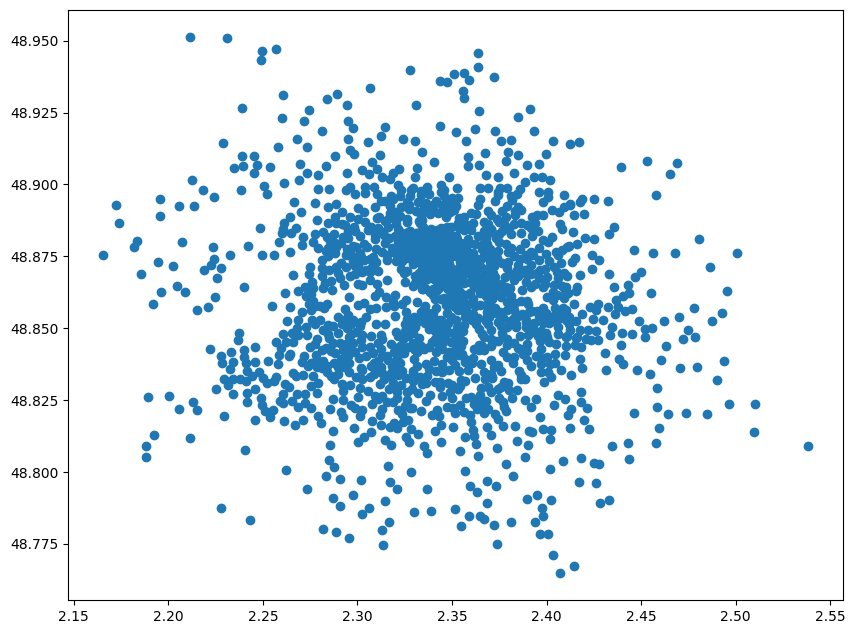

In [13]:
geo_stats.plot(figsize=(10, 10));

Demandons à GeoPandas de changer la taille de nos marqueurs en fonction de la capacité de chaque station :

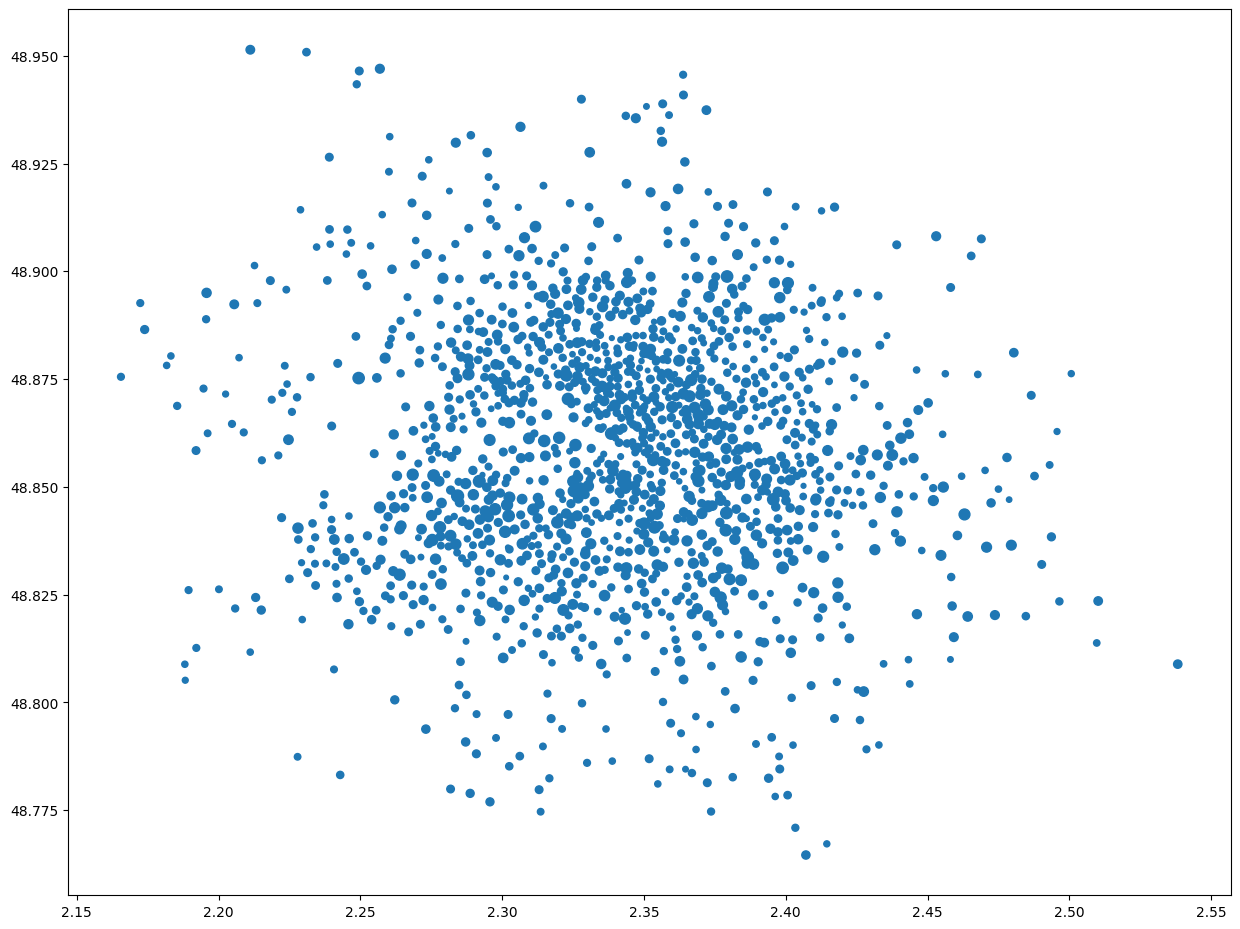

In [6]:
geo_stats.plot(markersize=geo_stats.capacity, figsize=(15, 15));

Ou encore, de changer la taille de nos marqueurs en fonction du nombre de vélibs dans la station :

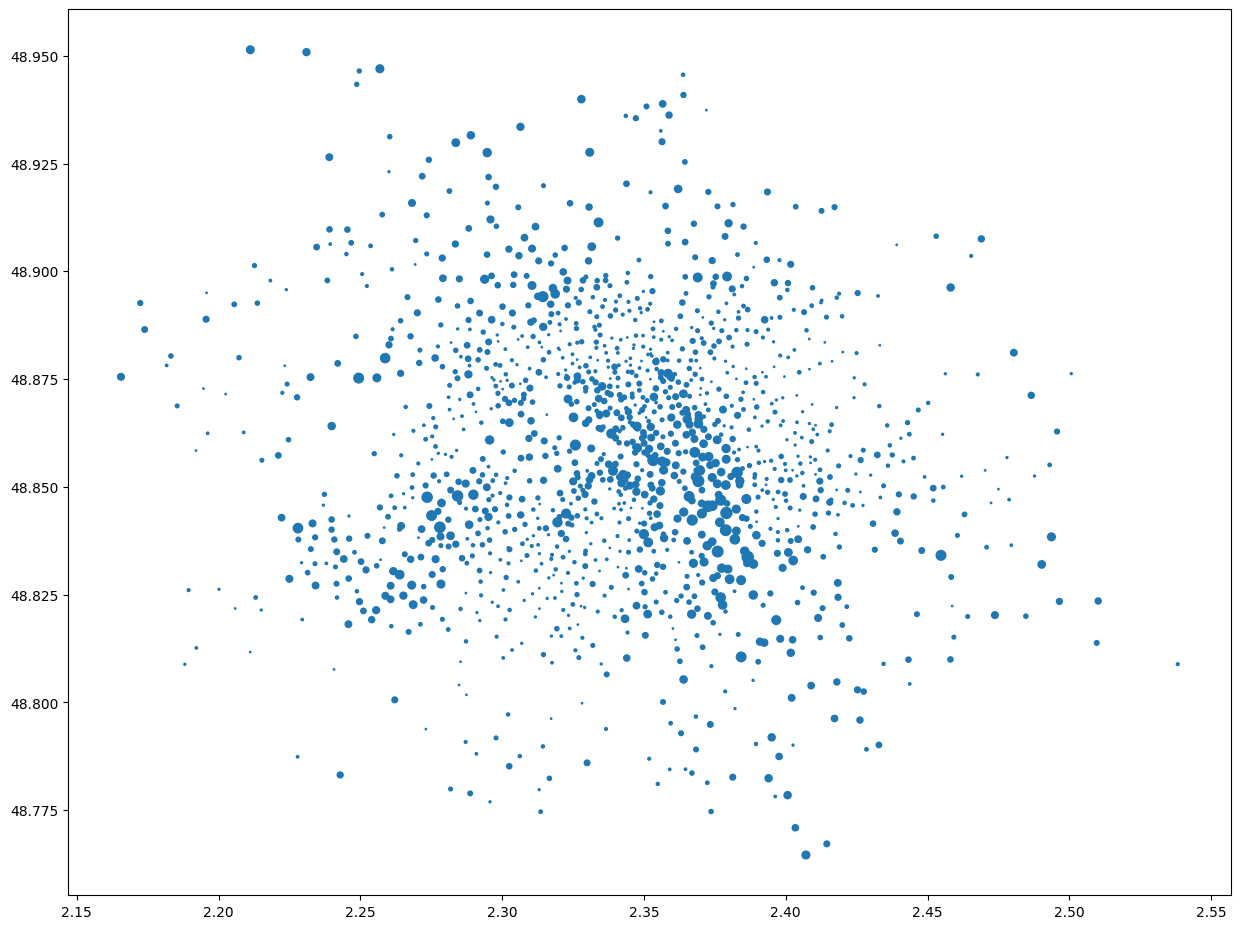

In [7]:
geo_stats.plot(markersize=geo_stats.num_bikes_available, figsize=(15, 15));

On se représente déjà mieux la distribution du nombre de vélibs dans Paris ! Mais au lieu de jouer uniquement avec la taille des marqueurs, on peut aussi varier leur couleur en spécifiant une carte de couleur `cmap` :

> les différentes cartes des couleurs peuvent être consulter ici [matplotlib colormaps](https://matplotlib.org/stable/tutorials/colors/colormaps.html).

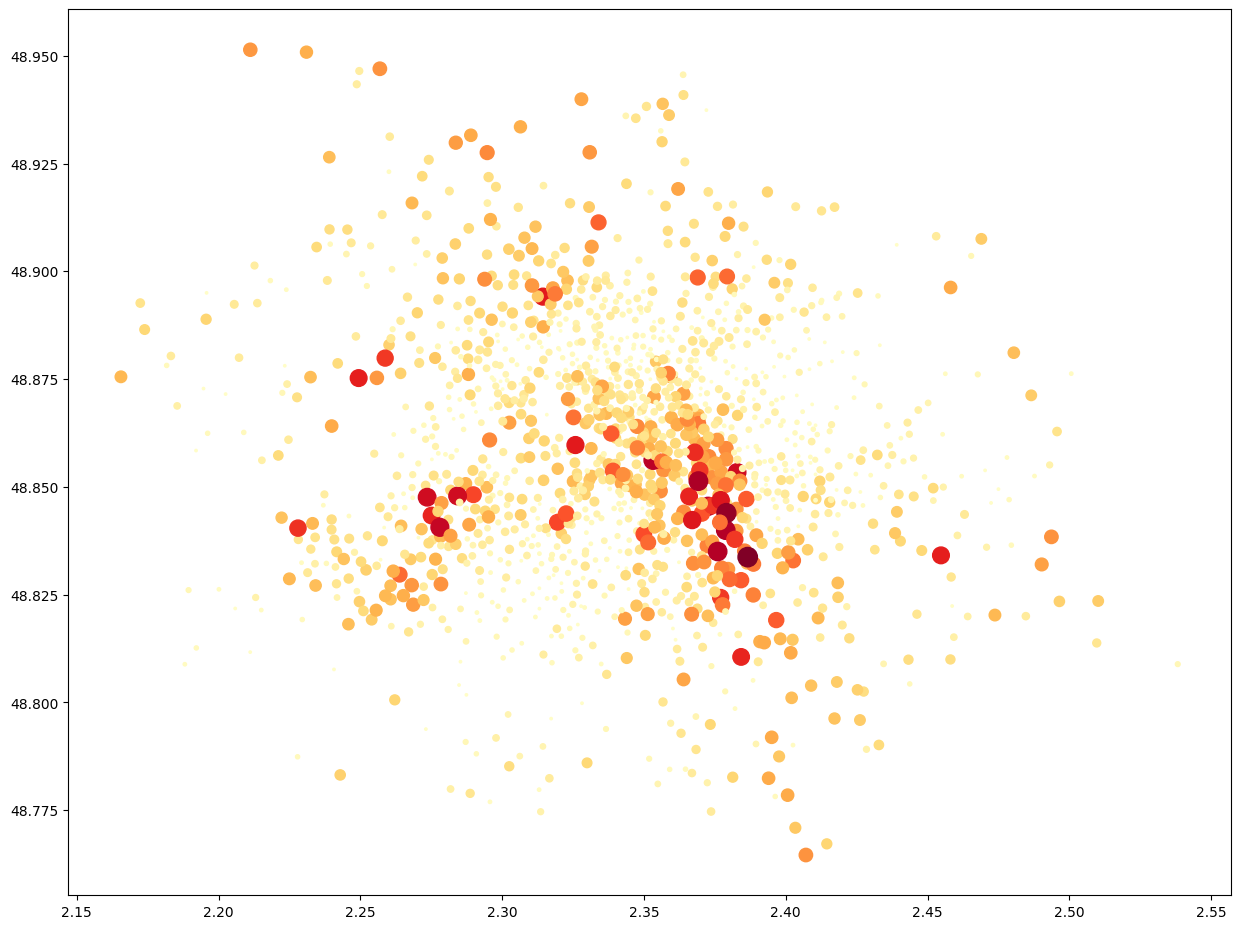

In [8]:
# figure et axes graphiques
f, axes = plt.subplots(1, figsize=(15,15))

# affichage des stations gélocalisés
geo_stats.plot(geo_stats.num_bikes_available, markersize=3*geo_stats.num_bikes_available, cmap="YlOrRd", ax=axes);

# affichage forçé
plt.show()

Maintenant nous allons pouvoir ajouter un fond de carte provenant, par exemple, de [OpenStreetMap](https://www.openstreetmap.fr/). Il existe un module python pour faire ça en une ligne et ce module s'appelle `contextily`. Le seul pré-requis est de convertir les coordonnées GPS au format EPSG:3857, mais GeoPandas fait ça très bien :

In [9]:
# conversion de coordonnées : contextily utilise les coordonnées EPSG:3857
geo_data_with_map = geo_stats.to_crs(epsg=3857)

# figure et axes graphiques
f, axes = plt.subplots(1, figsize=(15,15))

# affichage des stations gélocalisés
geo_data_with_map.plot(geo_stats.num_bikes_available, markersize=3*geo_stats.num_bikes_available, cmap="YlOrRd", ax=axes)

# effacement des axes gradués
axes.set_axis_off()

# ajout du fond de carte correspondant aux coordonnées géographiques des stations
ctx.add_basemap(axes)

# affichage forçé
plt.show()

Output hidden; open in https://colab.research.google.com to view.

## Exportation des représentations

Il s'agit ici d'exporter les représentations graphiques obtenues sous forme d'images sauvegardées dans un dossier sur le Drive.

Ce dossier est `/SAE15/web/data/` présent dans l'arborescence de votre projet.

Les images, sauvegardées dans cet emplacement, seront intégrées automatiquement dans la page Web `projetSAE15.html`, page de publication des résultats de l'analyse des données Vélib.

Le code suivant montre de quelle manière opérer une telle sauvegarde après avoir affiché une figure :


In [14]:
# conversion de coordonnées : contextily utilise les coordonnées EPSG:3857
geo_data_with_map = geo_stats.to_crs(epsg=3857)

# figure et axes graphiques
f, axes = plt.subplots(1, figsize=(15,15))

# affichage des stations gélocalisés
geo_data_with_map.plot(geo_stats.num_bikes_available, markersize=3*geo_stats.num_bikes_available, cmap="YlOrRd", ax=axes);


# effacement des axes gradués
axes.set_axis_off()

# ajout du fond de carte correspondant aux coordonnées géographiques des stations
ctx.add_basemap(axes,alpha=1)

# sauvegarde de la figure courante sur le Drive au format SVG (vectoriel)
plt.savefig('/content/drive/My Drive/Colab Notebooks/SAE15/web/data/carte1.svg')

# affichage forçé
plt.show()

Output hidden; open in https://colab.research.google.com to view.

## Générez votre propre carte

On vous demande de générer votre propre carte des stations Vélib géolocalisées afin de représenter une information de votre choix (capacité des stations, stands disponibles, taux de disponibilité des vélos ou des stands,...).

> On pourra également ajouter un titre (méthode `title` pour les axes) avec la date de dernière mise à jour des données (fonction spécifique `sae15_spec.getLatestDate()`).

> Il est également possible de représenter deux types d'informations sur une même carte en jouant avec la taille des points d'une part et, d'autre part avec leur couleur.

⚠ Vérifier la bonne exportation de la carte vers le dossier destination `SAE15/web/data/`.

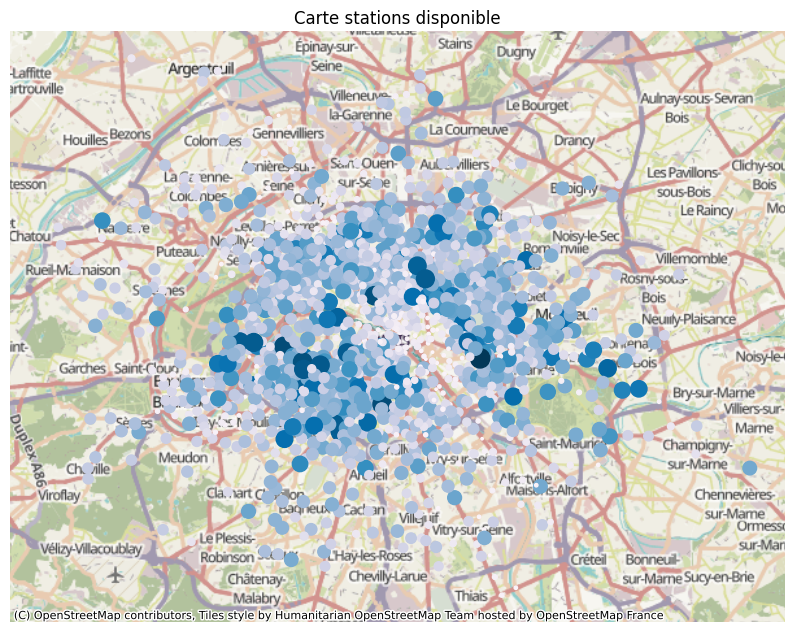

In [17]:
# conversion de coordonnées : contextily utilise les coordonnées EPSG:3857
geo_data_with_map = geo_stats.to_crs(epsg=3857)

# figure et axes graphiques
f, axes = plt.subplots(1, figsize=(10,10))

# affichage des stations gélocalisés
geo_data_with_map.plot(geo_stats.num_docks_available, markersize=3*geo_stats.num_docks_available, cmap="PuBu", ax=axes);
plt.title("Carte stations disponible", loc = 'center')

# effacement des axes gradués
axes.set_axis_off()

# ajout du fond de carte correspondant aux coordonnées géographiques des stations
ctx.add_basemap(axes,alpha = 1)

# sauvegarde de la figure courante sur le Drive au format SVG (vectoriel)
plt.savefig('/content/drive/My Drive/Colab Notebooks/SAE15/web/data/carte2.svg')

# affichage forçé
plt.show()

---
🎯  Livrer ce test unitaire sur Eprel en fin de séance

---





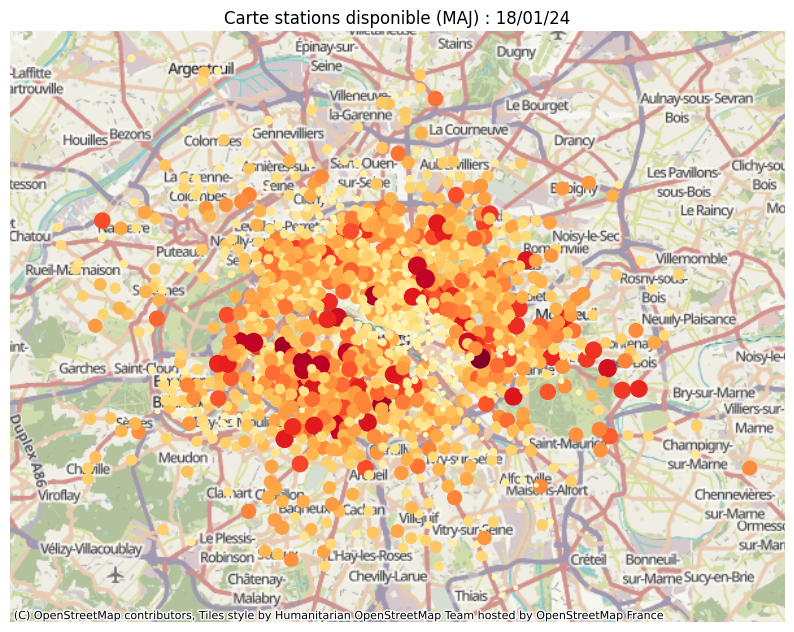

In [20]:
#------------------------------------------------------------------------------------------------
# fonction qui affiche et exporte la carte des stations Vélibs géolocalisées
def exportCityMap(geo_stations, marker_size, marker_color, title, date=None, filename=None) :

    # figure et axes
    f, axes = plt.subplots(1, figsize=(10,10))



    # conversion des coordonnées dans le système approprié
    geo_data_ = gpd.GeoDataFrame(geo_stations, crs="EPSG:4326", geometry=geom)

    # affichage en fonction des variables passées en argument
    geo_data_with_map.plot(geo_stations.num_docks_available, markersize=marker_size*geo_stations.num_docks_available, cmap=marker_color, ax=axes);

    # effacement des axes gradués
    axes.set_axis_off()


    # ajout du fond de carte correspondant aux coordonnées géographiques des stations
    ctx.add_basemap(axes)


    # affichage du titre avec la date de mise à jour
    plt.title( title + date, loc = 'center')


    # sauvegarde de la carte sur le Drive
    plt.savefig('/content/drive/My Drive/Colab Notebooks/SAE15/web/data/' + filename +'.svg')
    # affichage forçé
    plt.show()

    return

exportCityMap(geo_stats, 3 , "YlOrRd", "Carte stations disponible (MAJ) : ", "18/01/24", "carte1")

#NOM : de Castro
#PRENOM : Kier
#GROUPE : TP1A